In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_csv('Data and Pivot Table dataset.csv')

In [8]:
data.head()

,Station,Year,Month,Day,Hour,Season,Visibility (m),Visibility type
0,411840,2010,1,1,0,Winter,9978.0,Blowing Dust
1,411840,2010,1,1,1,Winter,9978.0,Blowing Dust
2,411840,2010,1,1,2,Winter,9978.0,Blowing Dust
3,411840,2010,1,1,3,Winter,9978.0,Blowing Dust
4,411840,2010,1,1,4,Winter,9978.0,Blowing Dust


In [10]:
data.shape

(550092, 8)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550092 entries, 0 to 550091
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Station          550092 non-null  int64  
 1   Year             550092 non-null  int64  
 2   Month            550092 non-null  int64  
 3   Day              550092 non-null  int64  
 4   Hour             550092 non-null  int64  
 5   Season           550092 non-null  object 
 6   Visibility (m)   412927 non-null  float64
 7   Visibility type  396055 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 33.6+ MB


In [14]:
data.isnull().sum()

Station                 0
Year                    0
Month                   0
Day                     0
Hour                    0
Season                  0
Visibility (m)     137165
Visibility type    154037
dtype: int64

In [16]:
data=data.dropna(axis=0)

In [18]:
data.isnull().sum()

Station            0
Year               0
Month              0
Day                0
Hour               0
Season             0
Visibility (m)     0
Visibility type    0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396055 entries, 0 to 550091
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Station          396055 non-null  int64  
 1   Year             396055 non-null  int64  
 2   Month            396055 non-null  int64  
 3   Day              396055 non-null  int64  
 4   Hour             396055 non-null  int64  
 5   Season           396055 non-null  object 
 6   Visibility (m)   396055 non-null  float64
 7   Visibility type  396055 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 27.2+ MB


In [22]:
data

,Station,Year,Month,Day,Hour,Season,Visibility (m),Visibility type
0,411840,2010,1,1,0,Winter,9978.0,Blowing Dust
1,411840,2010,1,1,1,Winter,9978.0,Blowing Dust
2,411840,2010,1,1,2,Winter,9978.0,Blowing Dust
3,411840,2010,1,1,3,Winter,9978.0,Blowing Dust
4,411840,2010,1,1,4,Winter,9978.0,Blowing Dust
...,...,...,...,...,...,...,...,...
550076,412180,2017,12,25,6,Winter,9978.0,Blowing Dust
550088,412180,2017,12,25,18,Winter,9978.0,Blowing Dust
550089,412180,2017,12,25,19,Winter,7081.0,Blowing Dust
550090,412180,2017,12,25,20,Winter,6115.0,Blowing Dust


In [24]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [26]:
data.head()

,Station,Year,Month,Day,Hour,Season,Visibility (m),Visibility type
0,411840,2010,1,1,0,3,9978.0,0
1,411840,2010,1,1,1,3,9978.0,0
2,411840,2010,1,1,2,3,9978.0,0
3,411840,2010,1,1,3,3,9978.0,0
4,411840,2010,1,1,4,3,9978.0,0


C:\Users\neeha\AppData\Local\Temp\ipykernel_15824\3735595739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour',data=data,palette='magma')


<Axes: xlabel='Hour', ylabel='count'>

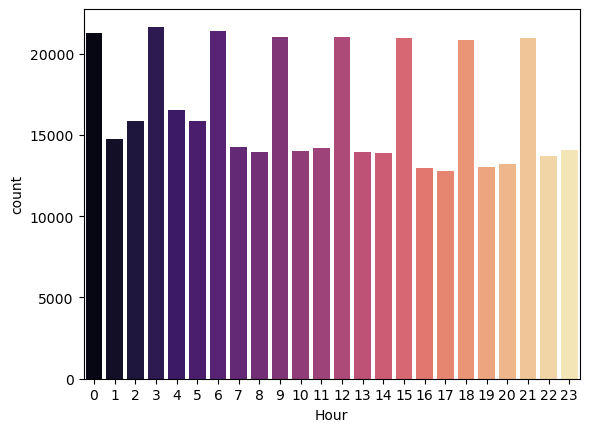

In [28]:
sns.countplot(x='Hour',data=data,palette='magma')

<Axes: xlabel='Year', ylabel='count'>

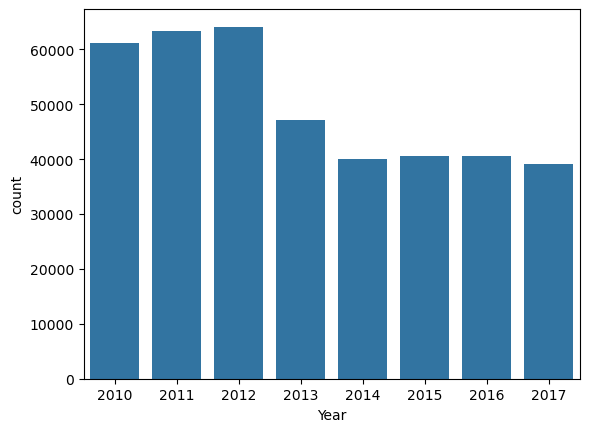

In [29]:
sns.countplot(x='Year',data=data)

In [31]:
data.drop(['Visibility type'], axis = 1,inplace=True)

In [34]:
data.head()

,Station,Year,Month,Day,Hour,Season,Visibility (m)
0,411840,2010,1,1,0,3,9978.0
1,411840,2010,1,1,1,3,9978.0
2,411840,2010,1,1,2,3,9978.0
3,411840,2010,1,1,3,3,9978.0
4,411840,2010,1,1,4,3,9978.0


In [36]:
X = data[['Station','Year','Month','Day','Hour','Season' ]].values
y = data['Visibility (m)'].values


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train,y_train)
print(MultiNB)
y_pred = MultiNB.predict(X_test)

MultinomialNB()


In [44]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
#print(classification_report(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))



Accuracy Score 0.4855386246859653


In [46]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=10, max_features=None)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy for RandomForest:\t"+str(accuracy1))

Accuracy for RandomForest:	0.6572130133441062


In [47]:
df1 = pd.DataFrame({'Actual':y_test,'MultiNB':y_pred,
                  'model1':y_pred1})

In [48]:
df1

,Actual,MultiNB,model1
0,6115.0,9978.0,4023.0
1,9978.0,9978.0,9978.0
2,4506.0,9978.0,4506.0
3,7081.0,9978.0,7081.0
4,9012.0,9978.0,9012.0
...,...,...,...
158417,9978.0,9978.0,9978.0
158418,4989.0,9978.0,4989.0
158419,9978.0,9978.0,9978.0
158420,7081.0,9978.0,7081.0


In [49]:
import matplotlib.pyplot as plt

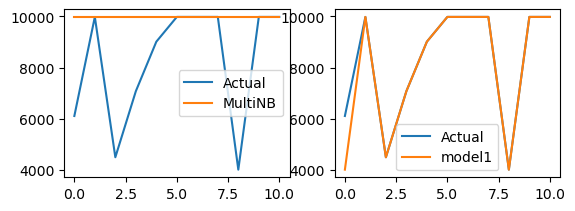

In [54]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['MultiNB'].iloc[0:11],label="MultiNB")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['model1'].iloc[0:11],label="model1")
plt.legend()

In [56]:
from sklearn import metrics

In [58]:
score1 = metrics.r2_score(y_test,y_pred)
score2 = metrics.r2_score(y_test,y_pred1)

In [60]:
print(score1,score2)

-1.2503076911124191 0.4601604326830293


In [62]:
s1 = metrics.mean_absolute_error(y_test,y_pred)
s2 = metrics.mean_absolute_error(y_test,y_pred1)

In [64]:
print(s1,s2)

1885.8974321748242 731.7564984661221


In [66]:
df = pd.DataFrame({
    'Station': 412180 ,
    'Year': 2024,
    'Month' : 9,
    'Day' : 13,
        'Hour' : 5,
        'Season' : ['Winter'],
})

In [68]:
df

,Station,Year,Month,Day,Hour,Season
0,412180,2024,9,13,5,Winter


In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Season'] = le.fit_transform(df['Season'])

In [72]:
new_pred = model1.predict(df)
print(new_pred)

[9012.]


C:\Users\neeha\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [74]:
import joblib

In [76]:
joblib.dump(model1,'model_joblib_model1')

['model_joblib_model1']

In [77]:
model = joblib.load('model_joblib_model1')

In [79]:
model.predict(df)

C:\Users\neeha\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([9012.])

In [82]:
from tkinter import *

In [84]:
import joblib

In [ ]:
import tkinter as tk
from joblib import load
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv('Data and Pivot Table dataset.csv')


def show_entry():
    
    le = LabelEncoder()
    df['Season'] = le.fit_transform(df['Season'])
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = e6.get()


    p6 = le.transform([p6])[0]

    model = load('model_joblib_model1')
    result = model.predict([[p1, p2, p3, p4, p5, p6]])
    
    result = max(0, result)
    if result[0] > 9000:
        Label(master, text="Chance of Dust Storm!").grid(row=8)
    else:
        Label(master, text="No Dust Storm predicted").grid(row=8)

    Label(master, text="Dust arrival").grid(row=6)
    Label(master, text=str(result[0])).grid(row=7)

master = tk.Tk()
master.title("Dust Arrival Prediction")

label = tk.Label(master, text="Dust Arrival Prediction ", bg="black", fg="white").grid(row=0, columnspan=2)

tk.Label(master, text="Enter Station ").grid(row=1)
tk.Label(master, text="Enter Year").grid(row=2)
tk.Label(master, text="Enter Month").grid(row=3)
tk.Label(master, text="Enter Day").grid(row=4)
tk.Label(master, text="Enter Hour").grid(row=5)
tk.Label(master, text="Enter Season").grid(row=6)

e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)
e5 = tk.Entry(master)
e6 = tk.Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

tk.Button(master, text="predict", command=show_entry).grid()

master.mainloop()